In [4]:
import pandas as pd
import numpy as np


from sklearn.naive_bayes import GaussianNB
import sklearn.pipeline
import sklearn.grid_search
import sklearn.metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
theory = pd.read_csv('theory.csv')
theory = theory.drop('slno', 1)
theory.info()
theory.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 4 columns):
PSPC     131 non-null int64
OOT      131 non-null int64
DSA      131 non-null int64
class    131 non-null object
dtypes: int64(3), object(1)
memory usage: 4.6+ KB


,PSPC,OOT,DSA
count,131.000000,131.000000,131.000000
mean,65.572519,69.351145,66.412214
std,8.358350,11.272788,9.099341
min,55.000000,55.000000,55.000000
25%,60.000000,60.000000,60.000000
50%,65.000000,65.000000,65.000000
75%,70.000000,80.000000,75.000000
max,85.000000,90.000000,85.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xae6db02c>,
        <matplotlib.axes._subplots.AxesSubplot object at 0xae6603ec>]], dtype=object)

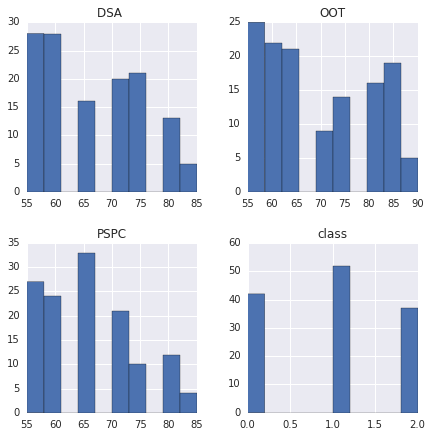

In [3]:
theory['class'] = theory['class'].map({'poor': 0, 'avg': 1, 'good': 2 })

theory.hist(figsize=(7, 7))

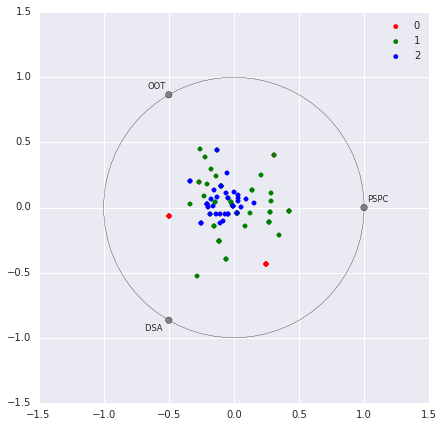

In [4]:
plt.figure(figsize=(7, 7))
pd.tools.plotting.radviz(theory, 'class', color=['r', 'g', 'b'])

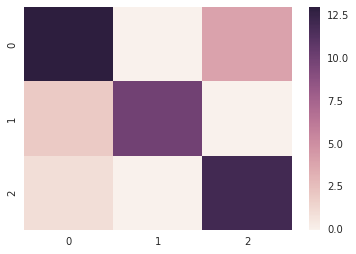

In [5]:
clf = GaussianNB()
mask = np.random.random(len(theory)) < 0.7
train, validate = theory[mask], theory[~mask]

clf.fit(train.drop('class', 1), train['class'])

predictions = clf.predict(validate.drop('class', 1))
sns.heatmap(confusion_matrix(validate['class'], predictions))